<a href="https://colab.research.google.com/github/wanasyraf4/Ikan_kekek2/blob/main/fish_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



from scipy import ndimage

from google.colab import drive

drive.mount('/content/drive/')

path = "/content/drive/My Drive/Colab Notebooks/Dataset/image_17.jpg"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Enter image

(426, 730, 3)


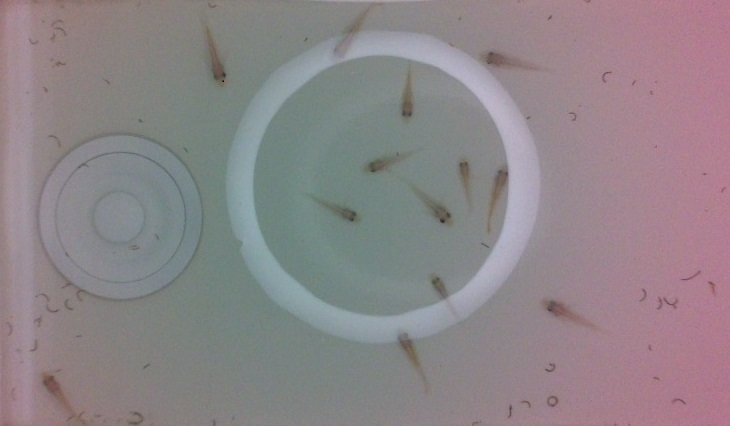

In [ ]:
# For colored Image
img = cv2.imread (path,1)   

# img.shape
from google.colab.patches import cv2_imshow

#dimension
dim_img = img.shape
print(dim_img)

cv2_imshow(img)


invert

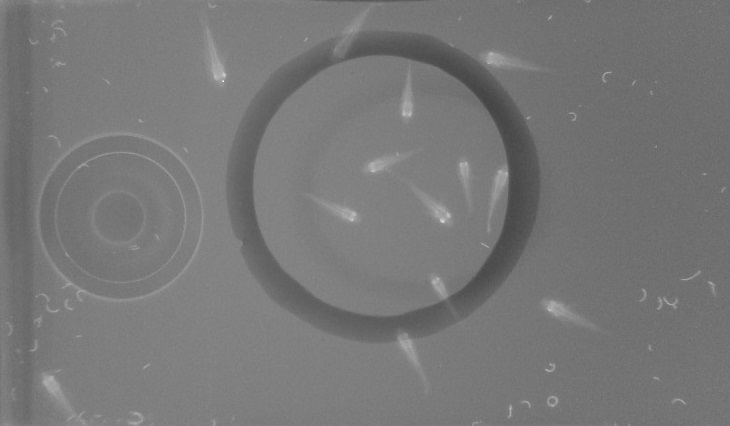

In [ ]:
g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g = cv2.bitwise_not(g)
cv2_imshow(g)



hist

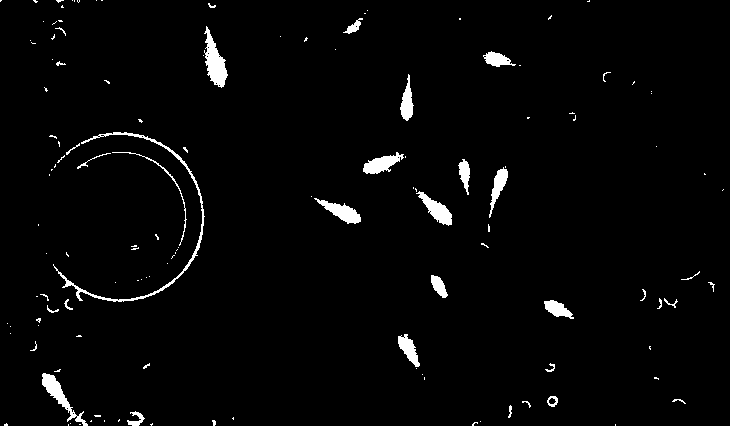

In [ ]:
X = np.mean(g)+ 1.58*np.std(g)
(thresh, bw) = cv2.threshold(g, X, 255, cv2.THRESH_BINARY)
cv2_imshow(bw)

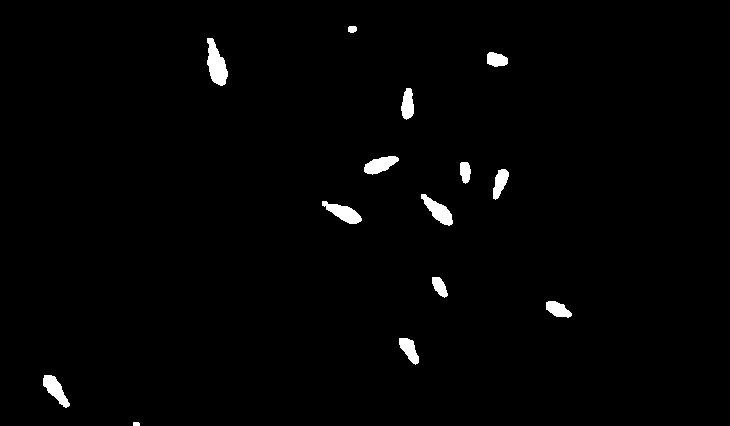

In [ ]:
strel = np.ones((4,4),np.uint8)
# opening = cv2.getStructuringElement( cv2.MORPH_ELLIPSE,strel)
ellip = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
# print(cv2.MORPH_OPEN)
result = cv2.morphologyEx(bw, cv2.MORPH_OPEN, ellip)
cv2_imshow(result)

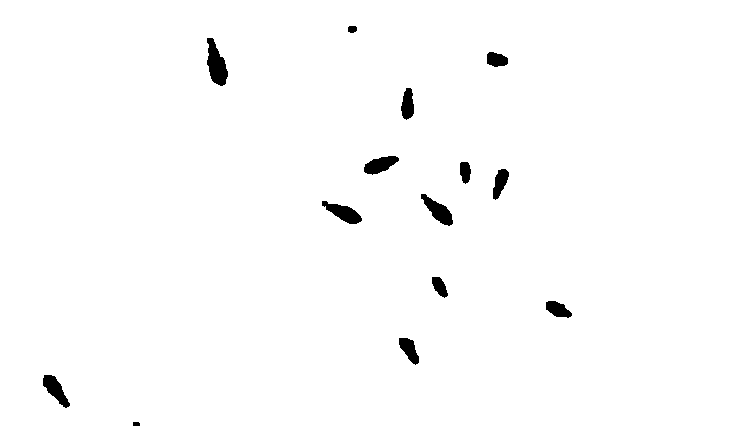

(426, 730)


In [ ]:

mask = np.full(result.shape,255)

bwboundary= mask - result
bwboundary = bwboundary.astype(np.uint8)

cv2_imshow(bwboundary)


dim_bwboundary= bwboundary.shape
print(dim_bwboundary)


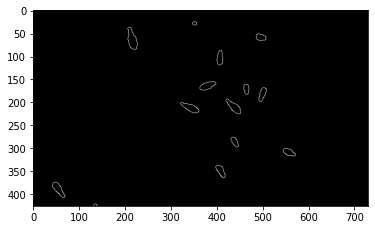

In [ ]:
#bwboundary

canny = cv2.Canny(bwboundary, 30, 150, 3)
plt.imshow(canny, cmap ='gray')


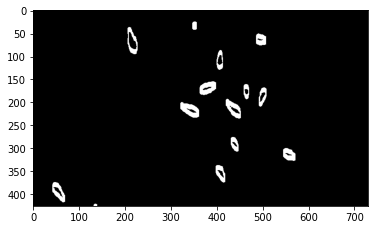

In [ ]:
dilated = cv2.dilate(canny, (1,1), iterations = 10)
plt.imshow(dilated, cmap ='gray')

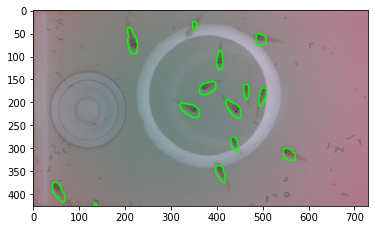

In [ ]:
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0),2)
plt.imshow(rgb)

In [ ]:
len(cnt)

14